# Proyek Analisis Data: Bike Sharing
- **Nama:** Romario Onsu
- **Email:** romarioonsu11@gmail.com
- **ID Dicoding:** romarioonsu

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaiamana Tren cuaca Pada Setiap Musim dan Bagaimana Pengaruh Faktor Cuaca Terhadap Jumlah Penyewaan Sepeda.
- Pertanyaan 2 : Bagaimana distribusi sewa berdasarkan jenis pengguna (casual vs registered) dan Pada musim apa jumlah sewa paling banyak (2011-2012).
- Pertanyaan 3 : Bagaimana Perbandingan jumlah sewa sepeda pada hari kerja dan hari libur untuk musim panas (Summer) dan musim dingin (Winter) di tahun 2011 dan 2012.


## Import Semua Packages/Library yang Digunakan

In [1]:
#Mengimport pustaka yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


## Data Wrangling

### Gathering Data

In [2]:
#menghubungkan ke google drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
#memanggil dataset dengan melabeli dataset menjadi df_day dan df_hour

df_day = pd.read_csv("/content/gdrive/MyDrive/dataset_bikesharing/day.csv")
df_hour = pd.read_csv("/content/gdrive/MyDrive/dataset_bikesharing/hour.csv")

In [4]:
#show dataset df_day
df_day.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [5]:
#show dataset df_hour
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

# Pada tahap ini akan melihat kedalaman data yang akan di proses

In [6]:
#mengecek data type df_day
print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [7]:
#mengecek duplicate pada data df_day
print('df_day(duplicate):', df_day.duplicated().sum())

#mengecek missing value pada data df_day
print('df_day(missing value):')
print(df_day.isna().sum())

df_day(duplicate): 0
df_day(missing value):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
#mengecek data type df_hour
print(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [9]:
#mengecek duplicate pada data df_hour
print('df_hour(duplicate):', df_day.duplicated().sum())

#mengecek missing value pada data df_hour
print('df_hour(missing value):')
print(df_day.isna().sum())


df_hour(duplicate): 0
df_hour(missing value):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Penjelasan**


1.   Pada pengecekan data types terdapat ketidaksesuian terhadap dtday, yang seharusnya meiliki data type datetime (terdapat pada 2 dataset) maka selanjutnya harus di sesuaikan dengan mengubah ke data types date time.
2.   pada pengecekan duplicate, kedua dataset tidak memiliki duplicate.
3.   Begitupun pada pengecekan missing value kedua dataset tidak memiliki nilai yang hilang.

Oleh karena itu pada cleaning data hanaya akan dilakukan pengubahan terhadap data types saja.



In [10]:
#Saya mengubah df_day ke day dan df_hour ke hour, agar menjadi lebih efektif saat memanggil dataset
day = df_day
hour = df_hour

# Dataset day

In [11]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
# Menghitung total penyewaan per musim
data_musim = day.groupby('season')['cnt'].sum()

# Mencari musim dengan penyewaan terbanyak
musim_terbanyak = data_musim.idxmax()
total_penyewaan_terbanyak = data_musim.max()

print(f"Musim dengan penyewaan terbanyak: {musim_terbanyak} dengan total {total_penyewaan_terbanyak} penyewaan.")


Musim dengan penyewaan terbanyak: 3 dengan total 1061129 penyewaan.


In [13]:
# Membandingkan jumlah penyewaan pada working day dan holiday
penyewaan_workingday = day[day['workingday'] == 1]['cnt'].sum()
penyewaan_holiday = day[day['holiday'] == 1]['cnt'].sum()

if penyewaan_workingday > penyewaan_holiday:
  print("Jumlah penyewaan pada working day lebih banyak.")
elif penyewaan_workingday < penyewaan_holiday:
  print("Jumlah penyewaan pada holiday lebih banyak.")
else:
  print("Jumlah penyewaan pada working day dan holiday sama.")


Jumlah penyewaan pada working day lebih banyak.


# Dataset hour

In [14]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [15]:
# Menghitung total penyewaan per musim pada dataset hour
hour_musim = hour.groupby('season')['cnt'].sum()

# Mencari musim dengan penyewaan terbanyak
musim_terbanyak = hour_musim.idxmax()
total_penyewaan_terbanyak = hour_musim.max()

print(f"Musim dengan penyewaan terbanyak: {musim_terbanyak} dengan total {total_penyewaan_terbanyak} penyewaan.")

Musim dengan penyewaan terbanyak: 3 dengan total 1061129 penyewaan.


In [16]:
# Membandingkan jumlah penyewaan pada working  dan holiday pada dataset hour
penyewaan_workingday = hour[hour['workingday'] == 1]['cnt'].sum()
penyewaan_holiday = hour[hour['holiday'] == 1]['cnt'].sum()

if penyewaan_workingday > penyewaan_holiday:
  print("Jumlah penyewaan pada working day lebih banyak.")
elif penyewaan_workingday < penyewaan_holiday:
  print("Jumlah penyewaan pada holiday lebih banyak.")
else:
  print("Jumlah penyewaan pada working day dan holiday sama.")


Jumlah penyewaan pada working day lebih banyak.


# Penjelasan dataset berdasarkan analisis
Pada kedua dataset ini terdapat beberapa kolom yang menjadi suatu indikator penting terhadap penyewaan sepeda, seperti musim, bulan, waktu kerja atau liburan, temperaturem sampai kecepatan angin.
1. Dataset berisi jumlah dari 2 tahun yaitu dari 2011-2012. Yang dimana untuk 2011 di tandai dengan 0 dan 1 untuk 2012.
2. Musim dengan penyewaan sepeda terbanyak yaitu pada musim 3 ditahun 2012 dengan jumlah 1061129 penyewaan.
3. Working day lebih banyak mendapat jumlah penyewaan sepeda dibanding saat holiday.



### Cleaning Data

In [17]:
#Mengubah format date type dari dteday pada dataset day
day["dteday"] = pd.to_datetime(day["dteday"])

print('dataset day kolom "dteday" menjadi :', day["dteday"].dtypes)

dataset day kolom "dteday" menjadi : datetime64[ns]


In [18]:
#Mengubah format date type dari dteday pada dataset hour
hour["dteday"] = pd.to_datetime(hour["dteday"])

print('dataset hour kolom "dteday" menjadi :', hour["dteday"].dtypes)

dataset hour kolom "dteday" menjadi : datetime64[ns]


## Exploratory Data Analysis (EDA)

In [19]:
# Menambahkan kolom total jumlah sewa
day['total'] = day['casual'] + day['registered']
# Mengatur ukuran plot
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

Text(0.5, 1.0, 'Jumlah Sewa Berdasarkan Musim')

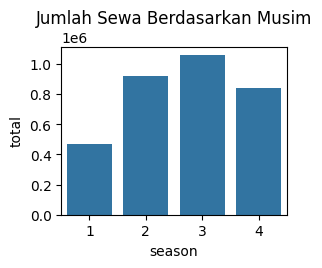

In [20]:
# Jumlah Sewa Berdasarkan Musim
plt.subplot(2, 2, 2)
season_stats = day.groupby('season')['total'].sum().reset_index()
sns.barplot(x='season', y='total', data=season_stats)
plt.title('Jumlah Sewa Berdasarkan Musim')

Text(0.5, 1.0, 'Jumlah Sewa Berdasarkan Bulan')

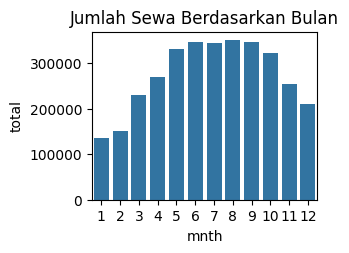

In [21]:
#  Jumlah Sewa Berdasarkan Bulan
plt.subplot(2, 2, 3)
month_stats = day.groupby('mnth')['total'].sum().reset_index()
sns.barplot(x='mnth', y='total', data=month_stats)
plt.title('Jumlah Sewa Berdasarkan Bulan')

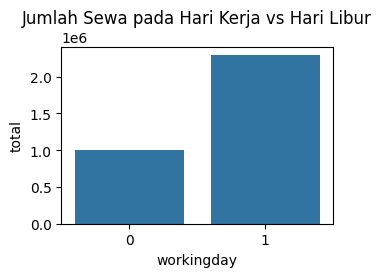

In [22]:
#Jumlah Sewa Berdasarkan Hari Kerja dan Libur
plt.subplot(2, 2, 4)
workingday_stats = day.groupby('workingday')['total'].sum().reset_index()
sns.barplot(x='workingday', y='total', data=workingday_stats)
plt.title('Jumlah Sewa pada Hari Kerja vs Hari Libur')

plt.tight_layout()
plt.show()

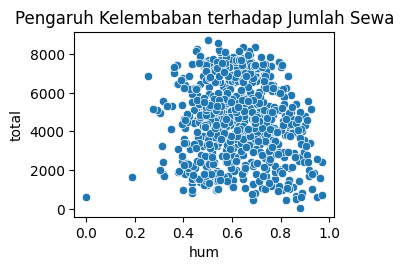

In [23]:
#  Pengaruh Kelembaban terhadap Jumlah Sewa
plt.subplot(2, 2, 4)
sns.scatterplot(x='hum', y='total', data=day)
plt.title('Pengaruh Kelembaban terhadap Jumlah Sewa')

plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

## Pertanyaan 1: Bagaiaman Tren cuaca Pada Setiap Musim dan Bagaimana Pengaruh Faktor Cuaca Terhadap Jumlah Penyewaan Sepda.

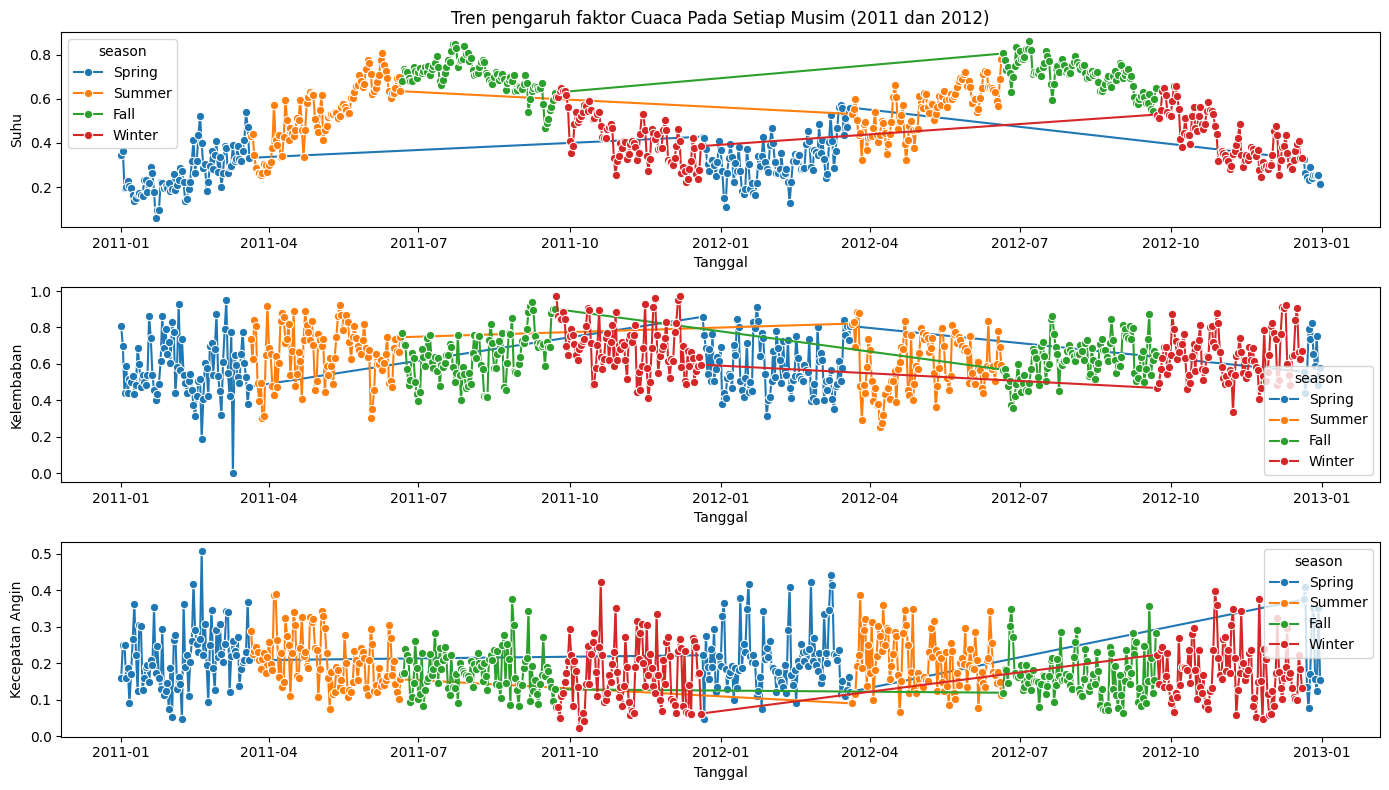

In [24]:
#Tren Pengaruh cuaca pada setiap musim

day['total'] = day['casual'] + day['registered']
day['dteday'] = pd.to_datetime(day['dteday'])
day['yr'] = day['dteday'].dt.year
day['season'] = day['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Pengaruh Faktor Cuaca
plt.figure(figsize=(14, 8))

# Suhu
plt.subplot(3, 1, 1)
sns.lineplot(x='dteday', y='temp', hue='season', data=day, marker='o')
plt.title('Tren pengaruh faktor Cuaca Pada Setiap Musim (2011 dan 2012)')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')

# Kelembaban
plt.subplot(3, 1, 2)
sns.lineplot(x='dteday', y='hum', hue='season', data=day, marker='o')
plt.xlabel('Tanggal')
plt.ylabel('Kelembaban')

# Kecepatan Angin
plt.subplot(3, 1, 3)
sns.lineplot(x='dteday', y='windspeed', hue='season', data=day, marker='o')
plt.xlabel('Tanggal')
plt.ylabel('Kecepatan Angin')

plt.tight_layout()
plt.show()

           temp     total
temp   1.000000  0.627494
total  0.627494  1.000000


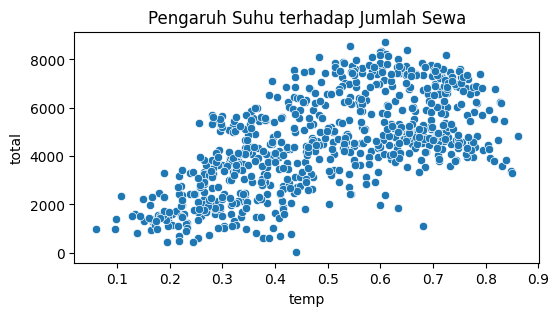

In [25]:
# Pengaruh Suhu Pada Total Sewa
correlation_temp_total = day[['temp', 'total']].corr()
print(correlation_temp_total)
plt.figure(figsize=(6, 3))
sns.scatterplot(x='temp', y='total', data=day)
plt.title('Pengaruh Suhu terhadap Jumlah Sewa')
plt.show()

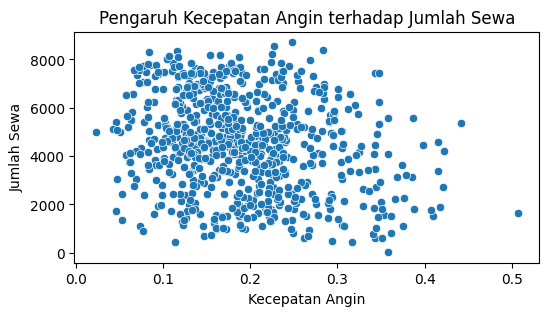

In [26]:
# Pengaruh kecepatan angin terhadap jumlah sewa
plt.figure(figsize=(6, 3))
sns.scatterplot(x='windspeed', y='total', data=day)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Sewa')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Sewa')
plt.show()

### Pertanyaan 2: Bagaimana distribusi sewa berdasarkan jenis pengguna (casual vs registered) dan Pada musim apa jumlah sewa paling banyak (2011-2012).

   season  casual  registered
0    Fall  226091      835038
1  Spring   60622      410726
2  Summer  203522      715067
3  Winter  129782      711831


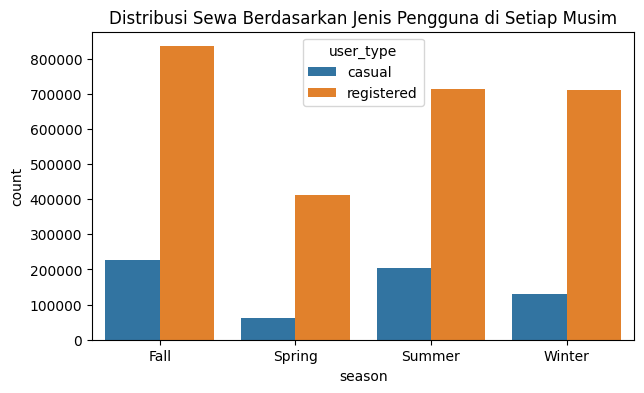

In [27]:
# Distribusi sewa berdasarkan jenis pengguna di setiap musim
season_user_stats = day.groupby(['season'])[['casual', 'registered']].sum().reset_index()
print(season_user_stats)

# Visualisasi
plt.figure(figsize=(7, 4))
season_user_stats_melted = season_user_stats.melt(id_vars=['season'], value_vars=['casual', 'registered'], var_name='user_type', value_name='count')
sns.barplot(x='season', y='count', hue='user_type', data=season_user_stats_melted)
plt.title('Distribusi Sewa Berdasarkan Jenis Pengguna di Setiap Musim')
plt.show()

   season    total
0    Fall  1061129
1  Spring   471348
2  Summer   918589
3  Winter   841613


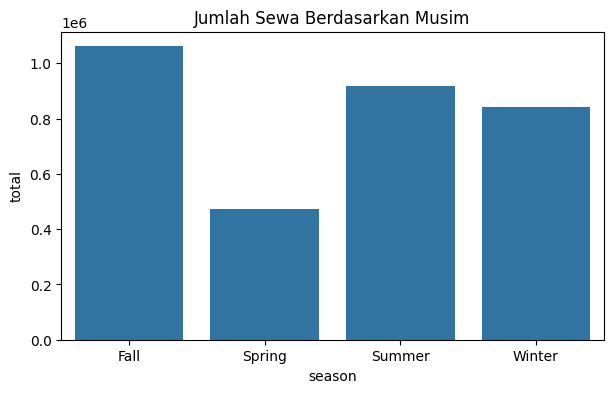

In [28]:
#  Total Sewa Berdasarkan Musim
day['total'] = day['casual'] + day['registered']
season_stats = day.groupby('season')['total'].sum().reset_index()
print(season_stats)

plt.figure(figsize=(7, 4))
sns.barplot(x='season', y='total', data=season_stats)
plt.title('Jumlah Sewa Berdasarkan Musim')
plt.show()

## Pertanyaan 3: Bagaimana Perbandingan jumlah sewa sepeda pada hari kerja dan hari libur untuk musim panas (Summer) dan musim dingin (Winter) di tahun 2011 dan 2012

   season  workingday  casual  registered   total    day_type
0  Summer           0  105693      182283  287976  Hari Libur
1  Summer           1   97829      532784  630613  Hari Kerja
2  Winter           0   71294      191260  262554  Hari Libur
3  Winter           1   58488      520571  579059  Hari Kerja


<ipython-input-35-07381dc9c4a5>:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='total', hue='day_type', data=season_workingday_stats, palette='muted', ci=None)


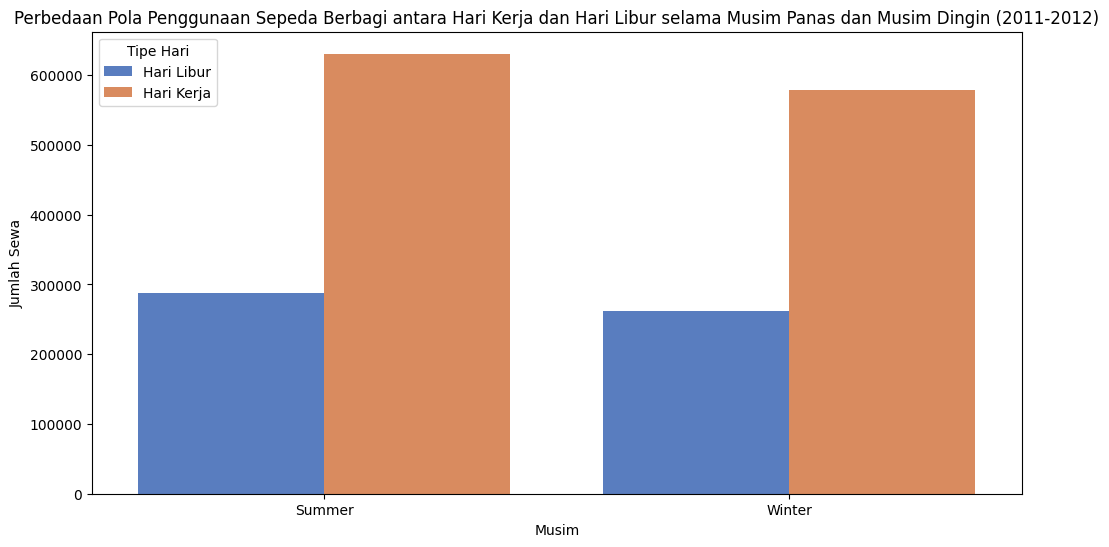

In [35]:
day = pd.read_csv('/content/day.csv')
day['total'] = day['casual'] + day['registered']
# Mengubah format tanggal dan menambahkan kolom tahun
day['dteday'] = pd.to_datetime(day['dteday'])
day['yr'] = day['dteday'].dt.year
day['season'] = day['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Filter data untuk tahun 2011 dan 2012, dan hanya musim panas dan musim dingin
filtered_day = day[((day['yr'] == 2011) | (day['yr'] == 2012)) & ((day['season'] == 'Summer') | (day['season'] == 'Winter'))]

# Distribusi sewa berdasarkan hari kerja/hari libur di musim panas dan musim dingin
season_workingday_stats = filtered_day.groupby(['season', 'workingday'])[['casual', 'registered']].sum().reset_index()
season_workingday_stats['total'] = season_workingday_stats['casual'] + season_workingday_stats['registered']
season_workingday_stats['day_type'] = season_workingday_stats['workingday'].map({1: 'Hari Kerja', 0: 'Hari Libur'})
print(season_workingday_stats)


plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='total', hue='day_type', data=season_workingday_stats, palette='muted', ci=None)
plt.title('Perbedaan Pola Penggunaan Sepeda Berbagi antara Hari Kerja dan Hari Libur selama Musim Panas dan Musim Dingin (2011-2012)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa')
plt.legend(title='Tipe Hari')
plt.show()


## Conclusion

- Pada pertanyaan 1 Tren faktor cuaca seperti suhu mengalami kenaikan pada musim panas dan gugur dan mengalami penurunan suhu saat musim dingin dan musim semi. Pada faktor kecepatan angin pada musim semi cenderung lebih tinggi dibandingkan denan musim lainnya. Kemudian Pengaruh dari Suhu pada jumlah penyewaan sepeda sangat berpengaruh dimana saat suhu lebih tinggi penyewaan sepeda cenderung lebih naik dibandingkan saat suhu dingin. Faktor dari Kecepatan angin juga berpengaruh dimana saat kecepatan angin rendah lebih memiliki jumlah sewa lebih banyak dibandingkan dengan saat kecepatan angin tinggi contoh pada musim semi.

- Pada pertanyaan 2 menganai distribusi penyewaan sepeda casual vs registered di setiap musim. Penggu registered mendapat angka jauh lebih tinggi dibandingkan dengan casual, dengan total penyewaan tertinggi di musim gugur sebesar 835.038. Ini adalah total tertinggi sehingga memungkinkan bagi pengembang bisnis untuk menaikan tarif sewa sepeda saat musim gugur sehingga bisa mendorong profit yang lebih tinggi dan mendapatkan balancing antara supply dan demand terhadap sewa sepeda ini.

- Pada pertanyaan 3 mengenai pola perbandingan antara penyewaan sepeda di hari libur dan hari kerja terhadap musim panas dan musim dingin. Hari kerja mendapat angka yang lebih tinggi dibandingkan hari libur. Dan musim panas lebih banyak mendapatkan penyewa dibandingkan dengan musim dingin. Salah satu strategi yang bisa diterapkan untuk mendongkrat profit dari perusahaan sewa sepeda dengan menaikan jumlah sewa sepeda diwaktu libur dengan cara memberikan beberapa promo menarik saat memasuki periode libur di musim panas dan musim dingin.